### Heather Lemon Final Project - Kronos Kidnapping

Github code link https://github.com/hypothetical-lemon/COMP4449-capstone/tree/main/final/KronosKidnapping 

## Table of Contents
* 1. [Introduction](#Introduction)
    * 1.1 [Goals](#goals)
    * 1.2 [Data Description](#data-description)
* 2. [Data Ingest](#data-ingest)
    * 2.1 [Employee email](#employee-emails)
    * 2.2 [Employee records](#employee-records)
    * 2.3 [News Articles](#news-articles)
    * 2.4 [Resumes](#resumes)
    * 2.5 [Historical Documents](#historical-documents)
    * 2.6 [Factbook](#factbook)
* 3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 3.1 [GASTech Email Frequency](#GASTech-Email-Frequency)
    * 3.2 [GASTech Communication Network Chord Graph](#gastech-communication-network-chord-graph)
    * 3.3 [Gephi](#gephi)
* 4. [Employee Records EDA](#employee-records-eda)
    * 4.1 [Query if a citzen's birth country is not the same as their current citizenship status](#query-if-a-citzens-birth-country-is-not-the-same-as-their-current-citizenship-status)
    * 4.2 [Query Are there any symapthizers within GASTech?](#query-are-there-any-symapthizers-within-gastech)
* 5. [News Article EDA](#news-article-eda)
    * 5.1 [Sentiment Analysis of News Articles with Pattern Library](#sentiment-analysis-of-news-articles-with-pattern-library)
* 6. [Timeline of Events from January 20-21st](#timeline-of-events-from-january-20-21st)
    * 6.1 [Which news reports are most trustworthy?](#which-news-reports-are-most-trustworthy)
    * 6.2 [Follow the CEO's movements during the kidnapping](#following-the-ceos-movements-during-the-kidnapping)
    * 6.3 [Average number of issued passports per year](#average-number-of-issued-passports-per-year)
    * 6.4 [Query on drugs in the city](#query-on-drugs-in-the-city)
* 7. [Conclusion](#Conclusion)

# Introduction 

In January 2014, the leaders of GAStech are celebrating their new-found fortune as a result of the initial public offering of their very successful company. In the midst of this celebration, several employees of GAStech go missing. An organization known as the Protectors of Kronos (POK) is suspected in the disappearance.

Your task is to bring law enforcement up to date on the current organization of the POK and how that organization has changed over time, as well as to characterize the events surrounding the disappearance. You are provided with a set of current and historical news reports at your disposal, as well as resumes of numerous GAStech employees and email headers from two weeks of internal GAStech company email. You are being counted on to bring law enforcement up to date on the current organization of the POK and how that organization has changed over time, as well as to characterize the events surrounding the disappearance.

### Goals
1.   Provide a clear analysis of the structure of the Protectors of Kronos network, with supporting evidence.
     * 1.1   Who are the leaders?
     * 1.2   Who is part of the extended network?
     * 1.3   How has the group structure and organization changed over time?
     * 1.4   Where are the potential connections between the POK and GAStech?
2.    Describe the events of January 20-21, 2014. What is the timeline of events?
3.    Provide at least two possible explanations why the GAStech employees may be missing. What evidence do you have to support each of these explanations?


### Data Description 

* A map of Kronos
    - Kronos has two cities (Elodis, Abila)
    - Tethys
* A chart describing the local GAStech organization, in PDF format.
* A spreadsheet of GAStech employee records, in Microsoft Excel format. The primary worksheet contains the data; the index worksheet contains the data dictionary
* Email headers from two weeks of internal GAStech company email, in comma-separated values (CSV) format
* Resumes and short biographies of many, but not all, of the GAStech employees, in Microsoft Word format
* Historical reports and descriptions of the countries involved, in Microsoft Word format
* Relevant current and historical news reports from multiple domestic and translated foreign sources, in text file format. Because these articles have come from multiple sources and original formats, some of the them may contain corrupted characters.

In [454]:
import os
import pandas as pd
import numpy as np 
import re
from datetime import datetime
from d3blocks import d3blocks
from nltk.corpus import stopwords
import string
import nltk
import docx
from collections.abc import Iterable
from pattern.en import sentiment, subjectivity
import seaborn as sns
import plotly.express as px

In [455]:
nltk.download('stopwords')
sw = set(stopwords.words('english'))
list(sw)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Heather\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


["don't",
 'hers',
 'an',
 "didn't",
 'during',
 "couldn't",
 'out',
 'own',
 'all',
 "isn't"]

In [456]:
print(set(string.punctuation))

{'.', '#', '\\', '"', '{', '-', ':', '&', '$', '(', '}', ']', '=', '`', '?', ')', '/', '+', '!', '<', '%', ',', '~', '@', '^', '>', '[', '*', ';', '|', '_', "'"}


## Data Ingest

### Employee Records

In [457]:
employee_records_df = pd.read_excel('EmployeeRecords.xlsx', sheet_name='Employee Records')
employee_records_df.head(2)

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate
0,Bramar,Mat,1981-12-19,Tethys,Male,Tethys,BirthNation,1981-12-19,Tethys,2007-12-12,2017-12-11,Administration,Assistant to CEO,2005-07-01,Mat.Bramar@gastech.com.kronos,NaN,NaN,NaT
1,Ribera,Anda,1975-11-17,Tethys,Female,Tethys,BirthNation,1975-11-17,Tethys,2009-06-15,2019-06-14,Administration,Assistant to CFO,2009-10-30,Anda.Ribera@gastech.com.kronos,NaN,NaN,NaT


For datetime64[ns] types, NaT represents missing values. (Not a valid time). 

While NaN is the default missing value marker for reasons of computational speed and convenience. In many cases, however, the Python `None` will arise and we wish to also consider that “missing” or “not available” or “NA”. 

In [458]:
index_employee_records_df = pd.read_excel('EmployeeRecords.xlsx', sheet_name='Index')
index_employee_records_df.head(3)

,Field Name,Description
0,LastName,the last name of the employee
1,FirstName,the first name of the employee
2,BirthDate,the birth date of the employee


In [459]:
employee_records_df.shape

(54, 18)

In [460]:
employee_records_df.dtypes

LastName                              object
FirstName                             object
BirthDate                     datetime64[ns]
BirthCountry                          object
Gender                                object
CitizenshipCountry                    object
CitizenshipBasis                      object
CitizenshipStartDate          datetime64[ns]
PassportCountry                       object
PassportIssueDate             datetime64[ns]
PassportExpirationDate        datetime64[ns]
CurrentEmploymentType                 object
CurrentEmploymentTitle                object
CurrentEmploymentStartDate    datetime64[ns]
EmailAddress                          object
MilitaryServiceBranch                 object
MilitaryDischargeType                 object
MilitaryDischargeDate         datetime64[ns]
dtype: object

In [461]:
employee_records_df.isnull().sum()

LastName                       0
FirstName                      0
BirthDate                      0
BirthCountry                   0
Gender                         0
CitizenshipCountry             0
CitizenshipBasis               0
CitizenshipStartDate           0
PassportCountry               21
PassportIssueDate             21
PassportExpirationDate        21
CurrentEmploymentType          0
CurrentEmploymentTitle         0
CurrentEmploymentStartDate     0
EmailAddress                   0
MilitaryServiceBranch         27
MilitaryDischargeType         27
MilitaryDischargeDate         27
dtype: int64

The missingness means the employee did not serve in a military branch.

The missingness from passport means they did not own a passport.

#### Feature Engineering: Create Full Name column

In [462]:
employee_records_df['FullName'] = employee_records_df['FirstName'] + ' ' + employee_records_df['LastName']

### Employee Emails

In [463]:
# single-byte charcter encoding of the latin alphabet
email_df = pd.read_csv('emailheaders.csv', encoding='cp1252')
email_df.head()

,From,To,Date,Subject
0,Sven.Flecha@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 8:39,GT-SeismicProcessorPro Bug Report
1,Kanon.Herrero@gastech.com.kronos,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",1/6/2014 8:58,Inspection request for site
2,Bertrand.Ovan@gastech.com.kronos,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",1/6/2014 9:28,New refueling policies - Effective February 1
3,Valeria.Morlun@gastech.com.kronos,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",1/6/2014 9:38,Route suggestion for next shift
4,Mat.Bramar@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",1/6/2014 9:49,Upcoming birthdays


In [464]:
print(email_df.shape)
print(email_df.dtypes)

(1170, 4)
From       object
To         object
Date       object
Subject    object
dtype: object


In [465]:
def stripEmail(email):
    return re.sub(pattern=r"\br\.|@[a-z][a-z.+]+.", repl="", string=email)

def addSplit(email):
    return re.sub(pattern="\.", repl=" ", string=email)

email_df['From'] = email_df['From'].apply(lambda x: stripEmail(x))
email_df['From'] = email_df['From'].apply(lambda x: addSplit(x))
email_df.head(3)

,From,To,Date,Subject
0,Sven Flecha,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 8:39,GT-SeismicProcessorPro Bug Report
1,Kanon Herrero,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",1/6/2014 8:58,Inspection request for site
2,Bertrand Ovan,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",1/6/2014 9:28,New refueling policies - Effective February 1


In [466]:
def stripEmail_From(email):
    return re.sub(pattern=r"\br\.|@[a-z][a-z.+]+.", repl="", string=email)

def addSplit(email):
    return re.sub(pattern="\.", repl=" ", string=email)

In [467]:
# M/D/YYYY
email_df['Date'] = pd.to_datetime(email_df['Date'], errors='raise')
email_df.dtypes

From               object
To                 object
Date       datetime64[ns]
Subject            object
dtype: object

In [468]:
print(email_df.shape)

(1170, 4)


In [469]:
punctuation = None 

def clean(text, stopwords) -> str:
    """
    Clean text sentence 
    Params: text: the string to clean
    stopwords: a list of NLTK stopwords to remove from input row
    Returns: cleaned sentence
    """ 
    text = re.sub(r'<[^>?]*>', '', text)
    text_list = text.split()
    text_words = []
    punctuation = set(string.punctuation)
    
    for word in text_list: 
        while len(word) > 0 and word[0] in punctuation: 
            word = word[1:]
        
        while len(word) > 0 and word[-1] in punctuation: 
            word = word[:-1]
            
        word = word.replace(',', '')
        word = word.replace('\"', '')
        word = word.replace('\'', '')

        if len(word) > 0 and "/" not in word: 
            if word.lower() not in stopwords: 
                text_words.append(word.lower())
        cleaner_text = " ".join(text_words)
    return cleaner_text

email_df['Subject'] = email_df['Subject'].apply(clean, stopwords=sw)
email_df.head(3)

,From,To,Date,Subject
0,Sven Flecha,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",2014-01-06 08:39:00,gt-seismicprocessorpro bug report
1,Kanon Herrero,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",2014-01-06 08:58:00,inspection request site
2,Bertrand Ovan,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",2014-01-06 09:28:00,new refueling policies effective february 1


### News Articles

News articles contain historical information.

In [470]:
def extract_article_name(name) -> str:
    """
    Params: str: article name
    Returns:
        str: shorten file name
    """
    return "article " + re.sub(pattern=r"\.+.*", repl="", string=name)

def extract_datetime(file) -> list:
    """
    Extract datetime of news article for timeline
    Params: article to parse
    Returns: list of matches or empty list if no matches
    """
    return re.findall(r'\d+/\d+/\d+', file) or re.findall(r'\d+ \w+ \d+', file) or re.findall(r'\d+\w+ \d+', file) or re.findall(r'\d+ \w+  \d+', file)

def extract_news_company(file) -> str:
    """
    Extract News outlet
    Params: article to parse
    Returns: list of matches or empty list if no matches
    """
    return re.match(r'\A.*', file).group()

def extract_data(rootdir, news_article) -> dict:
    """
    Params:
        rootdir (Path): path to search for article files
        news_article (dict): empty dict to fill of <article, description>
    Returns:
        news_article: full <article, description> dict
    """
    assert os.path.exists(rootdir)
    for subdir, dirs, files in os.walk(rootdir):
        assert os.path.exists(subdir)
        for file in files:
            if file.__contains__('txt'):
                nav_file = os.path.join(subdir, file)
                with open(nav_file, 'r') as datafile:
                    try:
                        news_name = extract_article_name(file)
                        news_article[news_name] = datafile.read()
                        datafile.close()
                    except Exception as ex:
                        print("Failed to parse article: ", ex)
                        continue
    return news_article

news_article = {}
rootdir = 'articles/'
news_article = extract_data(rootdir, news_article)
articles_df = pd.DataFrame.from_dict(data=news_article, orient='index', columns=['description'])
articles_df['news_company'] = articles_df['description'].apply(lambda x: extract_news_company(x))
articles_df['datetime'] = articles_df['description'].apply(lambda x: extract_datetime(x))
articles_df.reset_index(inplace=True)
print(articles_df.shape)
print(articles_df.dtypes)
articles_df.head()

(845, 4)
index           object
description     object
news_company    object
datetime        object
dtype: object


,index,description,news_company,datetime
0,article 0,The Orb\n\n\nBUMP OF PROTESTS IN ABILA IN RESP...,The Orb,[2012/09/08]
1,article 1,The Light of Truth\n\nENORMOUS IPO MAKES THE B...,The Light of Truth,[2013/12/18]
2,article 10,Homeland Illumination\nVOICES - a blog about w...,Homeland Illumination,"[20 January 2014, 20 Jan 2014]"
3,article 100,The Continent\n\nFour people have died in an e...,The Continent,[2007/03/19]
4,article 101,Daily Pegasus\n\nTHE DEMONSTRATION ATTRACTS TH...,Daily Pegasus,[2012/11/11]


In [471]:
articles_df['description'] = articles_df['description'].apply(clean, stopwords=sw)
articles_df.head()

,index,description,news_company,datetime
0,article 0,orb bump protests abila response calls action ...,The Orb,[2012/09/08]
1,article 1,light truth enormous ipo makes billionaire san...,The Light of Truth,[2013/12/18]
2,article 10,homeland illumination voices blog important pe...,Homeland Illumination,"[20 January 2014, 20 Jan 2014]"
3,article 100,continent four people died enthusiastic discha...,The Continent,[2007/03/19]
4,article 101,daily pegasus demonstration attracts thousands...,Daily Pegasus,[2012/11/11]


### Resumes

Using resumes to look up historical employee data

In [472]:
def extract_resume_name(name) -> str:
    """
    Params: str: resume name
    Returns:
        str: shorten file name
    """
    name = re.sub(pattern=r"\.+.*|Bio|Resume", repl="", string=name)
    name = re.sub(pattern=r"-", repl=" ", string=name)
    return name

def extract_data(rootdir, resumes) -> dict:
    """
    Params:
        rootdir (Path): path to search for article files
        news_article (dict): empty dict to fill of <article, description>
    Returns:
        news_article: full <article, description> dict
    """
    assert os.path.exists(rootdir)
    for subdir, dirs, files in os.walk(rootdir):
        assert os.path.exists(subdir)
        for file in files:
            if file.__contains__('docx'):
                nav_file = os.path.join(subdir, file)
                with open(nav_file, 'r') as datafile:
                    try:
                        resume_name = extract_resume_name(file)
                        doc = docx.Document(nav_file)
                        fullText = []
                        for para in doc.paragraphs:
                            fullText.append(para.text)
                        resumes[resume_name] = '\n'.join(fullText)
                        datafile.close()
                    except Exception as ex:
                        print("Failed to parse resume: ", ex)
                        continue
    return resumes

resumes = {}
rootdir = 'resumes/'
resumes = extract_data(rootdir, resumes)
resumes_df = pd.DataFrame.from_dict(data=resumes, orient='index', columns=['resume'])
resumes_df.reset_index(inplace=True)
print(resumes_df.shape)
resumes_df.head()

(35, 2)


,index,resume
0,Ada Campo,Ada Campo-Corrente\nChief Information Officer\...
1,Ingrid Barranco,Ingrid Barranco\nChief Financial Officer\n\n\n...
2,OrhanStrum,Orhan Strum\nChief Operating Officer\n\n\nMr. ...
3,Sten SanjorgeJr,"Sten Sanjorge, Jr\nPresident & CEO GASTech\nTe..."
4,Willem Vasco,Willem Vasco-Pais\nEnvironmental Safety Adviso...


In [473]:
def clean_text_resume(text):
    text = re.sub(r'<[^>?]*>', '', text)
    text_list = text.split()
    text_words = []
    punctuation = set(string.punctuation)
    
    for word in text_list: 
        while len(word) > 0 and word[0] in punctuation: 
            word = word[1:]
        
        while len(word) > 0 and word[-1] in punctuation: 
            word = word[:-1]
            
        word = word.replace(',', '')
        word = word.replace('\"', '')
        word = word.replace('\'', '')

        if len(word) > 0 and "/" not in word: 
            text_words.append(word.lower())
        cleaner_text = " ".join(text_words)
    return cleaner_text

resumes_df['resume'] = resumes_df['resume'].apply(clean_text_resume)
resumes_df.head()

,index,resume
0,Ada Campo,ada campo-corrente chief information officer m...
1,Ingrid Barranco,ingrid barranco chief financial officer ms ing...
2,OrhanStrum,orhan strum chief operating officer mr strum s...
3,Sten SanjorgeJr,sten sanjorge jr president ceo gastech tethys ...
4,Willem Vasco,willem vasco-pais environmental safety advisor...


### Historical Documents

In [474]:
def extract_doc_name(name) -> str:
    """
    Params: str: resume name
    Returns:
        str: shorten file name
    """
    return re.match(pattern=r"^([0-9]+ year).*$", string=name).group(1)

def extract_data(rootdir, hist_doc) -> dict:
    """
    Params:
        rootdir (Path): path to search for files
        news_article (dict): empty dict to fill of <article, description>
    Returns:
        news_article: full <article, description> dict
    """
    assert os.path.exists(rootdir)
    for subdir, dirs, files in os.walk(rootdir):
        assert os.path.exists(subdir)
        for file in files:
            if file.__contains__('docx'):
                nav_file = os.path.join(subdir, file)
                with open(nav_file, 'r') as datafile:
                    try:
                        hist_name = extract_doc_name(file)
                        doc = docx.Document(nav_file)
                        fullText = []
                        for para in doc.paragraphs:
                            fullText.append(para.text)
                        hist_doc[hist_name] = '\n'.join(fullText)
                        datafile.close()
                    except Exception as ex:
                        print("Failed to parse resume: ", ex)
                        continue
    return hist_doc

historical_doc = {}
rootdir = 'HistoricalDocuments/'
historical_doc = extract_data(rootdir, historical_doc)
historical_df = pd.DataFrame.from_dict(data=historical_doc, orient='index', columns=['description'])
historical_df.reset_index(inplace=True)
print(historical_df.shape)
historical_df.head()

(2, 2)


,index,description
0,10 year,\n\n<EXCERPTS from>The Application and Validat...
1,5 year,History of the Protectors of Kronos\nA Psycorp...


In [475]:
historical_df['description'].apply(clean_text_resume)
historical_df.head()

,index,description
0,10 year,\n\n<EXCERPTS from>The Application and Validat...
1,5 year,History of the Protectors of Kronos\nA Psycorp...


### FactBook

In [476]:
def extract_doc_name(name) -> str:
    """
    Params: str: resume name
    Returns:
        str: shorten file name
    """
    return re.match(pattern=r"^.*?(?=\.)", string=name).group(0)

def extract_data(rootdir, hist_doc) -> dict:
    """
    Params:
        rootdir (Path): path to search for files
        news_article (dict): empty dict to fill of <file name, description>
    Returns:
        news_article: full <file name, description> dict
    """
    assert os.path.exists(rootdir)
    for subdir, dirs, files in os.walk(rootdir):
        assert os.path.exists(subdir)
        for file in files:
            if file.__contains__('docx'):
                nav_file = os.path.join(subdir, file)
                with open(nav_file, 'r') as datafile:
                    try:
                        print(file)
                        file_name = str.lower(extract_doc_name(file))
                        doc = docx.Document(nav_file)
                        fullText = []
                        for para in doc.paragraphs:
                            fullText.append(para.text)
                        factbook_doc[file_name] = '\n'.join(fullText)
                        datafile.close()
                    except Exception as ex:
                        print("Failed to parse factbook: ", ex)
                        continue
    return factbook_doc

factbook_doc = {}
rootdir = 'factbook/'
factbook_doc = extract_data(rootdir, factbook_doc)
factbook_df = pd.DataFrame.from_dict(data=factbook_doc, orient='index', columns=['description'])
factbook_df.reset_index(inplace=True)
factbook_df.head()

FACTBOOK-Kronos.docx
FACTBOOK-Tethys.docx


,index,description
0,factbook-kronos,FACTBOOK :: Kronos \nIntroduction\nBackground:...
1,factbook-tethys,FACTBOOK :: Tethys\n\nIntroduction\nBackground...


In [477]:
factbook_df['description'].apply(clean_text_resume)
factbook_df.head()

,index,description
0,factbook-kronos,FACTBOOK :: Kronos \nIntroduction\nBackground:...
1,factbook-tethys,FACTBOOK :: Tethys\n\nIntroduction\nBackground...


## Exploratory Data Analysis

### Email Analysis

In [478]:
email_df.head()

,From,To,Date,Subject
0,Sven Flecha,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",2014-01-06 08:39:00,gt-seismicprocessorpro bug report
1,Kanon Herrero,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",2014-01-06 08:58:00,inspection request site
2,Bertrand Ovan,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",2014-01-06 09:28:00,new refueling policies effective february 1
3,Valeria Morlun,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",2014-01-06 09:38:00,route suggestion next shift
4,Mat Bramar,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",2014-01-06 09:49:00,upcoming birthdays


In [479]:
groupby_name = email_df.copy()
groupby_name = email_df.groupby(by=['From'])
groupby_name = groupby_name.count().sort_values(by='To', ascending=False)
groupby_name.head()

,To,Date,Subject
From,,,
Lucas Alcazar,59,59,59
Nils Calixto,54,54,54
Isak Baza,50,50,50
Sven Flecha,42,42,42
Mat Bramar,42,42,42


In [480]:
total_email_count = email_df.shape[0]
groupby_name['Frequency'] = groupby_name['To'].apply(lambda x: (x/total_email_count)*100)
groupby_name.head()

,To,Date,Subject,Frequency
From,,,,
Lucas Alcazar,59,59,59,5.042735
Nils Calixto,54,54,54,4.615385
Isak Baza,50,50,50,4.273504
Sven Flecha,42,42,42,3.589744
Mat Bramar,42,42,42,3.589744


In [481]:
comm_network = email_df.groupby(by=['From'])
comm_network.head()

,From,To,Date,Subject
0,Sven Flecha,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",2014-01-06 08:39:00,gt-seismicprocessorpro bug report
1,Kanon Herrero,"Felix.Resumir@gastech.com.kronos, Hideki.Cocin...",2014-01-06 08:58:00,inspection request site
2,Bertrand Ovan,"Emile.Arpa@gastech.com.kronos, Varro.Awelon@ga...",2014-01-06 09:28:00,new refueling policies effective february 1
3,Valeria Morlun,"Dante.Coginian@gastech.com.kronos, Albina.Hafo...",2014-01-06 09:38:00,route suggestion next shift
4,Mat Bramar,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",2014-01-06 09:49:00,upcoming birthdays
...,...,...,...,...
750,Minke Mies,Inga.Ferro@gastech.com.kronos,2014-01-14 15:36:00,late meeting
821,Marin Onda,Emile.Arpa@gastech.com.kronos,2014-01-15 11:17:00,files
829,Linnea Bergen,Claudio.Hawelon@gastech.com.kronos,2014-01-15 12:10:00,favor borrow hedge trimmer
848,Birgitta Frente,"Marin.Onda@gastech.com.kronos, Brand.Tempestad...",2014-01-15 13:26:00,wellhead flow rate data overpressure well 1783-03


### GASTech Email Frequency
ie. Ada emailed Felix 2 times

Also, does there exist any email accounts in which they are not in the employee records csv file? 

We also assert that the employee's email address is in the employee records csv file.

In [482]:
emails_sent = pd.DataFrame()
for employee_from_name, employee_to_name in comm_network:
    name_map_frequency = {}
    for arr_name in employee_to_name['To']:
        # check that email exists in employee records df
        counter = 0
        if arr_name.__contains__(","):
            arr_name = arr_name.split(",")
            for employee in arr_name: 
                try:
                    assert employee_records_df['EmailAddress'].eq(employee.strip()).any()
                    counter+=1
                    employee = stripEmail(employee)
                    employee = addSplit(employee)
                    name_map_frequency[employee] = name_map_frequency.get(employee, 0) + counter
                except Exception as ex:
                    print(employee)
        else:
            try:
                assert employee_records_df['EmailAddress'].eq(arr_name).any()
                counter+=1
                arr_name = stripEmail(arr_name)
                arr_name = addSplit(arr_name)
                name_map_frequency[arr_name] = name_map_frequency.get(arr_name, 0) + counter
            except Exception as ex:
                print(arr_name)
    emails_sent[employee_from_name] = name_map_frequency    
emails_sent = emails_sent.T

C:\Users\Heather\AppData\Local\Temp\ipykernel_20328\3833676466.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@gastech.com.tethys
 Sten.Sanjorge Jr.@ga

Sten.Sanjorge Jr has 2 email accounts: Sten.Sanjorge Jr.@gastech.com.kronos & Sten.Sanjorge Jr.@gastech.com.tethys

In [483]:
emails_sent.head()

,Felix Resumir,Rachel Pantanal,Lars Azada,Felix Balas,Isande Borrasca,Axel Calzas,Gustav Cazar,Lidelse Dedos,Birgitta Frente,Vira Frente,...,Carla Forluniau,Linda Lagos,Cornelia Lais,Ruscella Mies Haber,Anda Ribera,Orhan Strum,Ada Campo-Corrente,Ingrid Barranco,Ruscella Mies Haber,Willem Vasco-Pais
Ada Campo-Corrente,2.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,...,100.0,102.0,104.0,106.0,108.0,3.0,4.0,4.0,1.0,3.0
Adan Morlun,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,50.0,51.0,52.0,53.0,54.0,NaN,NaN,NaN,NaN,NaN
Adra Nubarron,NaN,3.0,19.0,24.0,18.0,18.0,34.0,36.0,39.0,39.0,...,150.0,153.0,156.0,159.0,162.0,NaN,NaN,NaN,2.0,NaN
Albina Hafon,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anda Ribera,NaN,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,128.0,103.0,143.0,118.0,80.0,NaN,NaN,NaN,NaN,NaN


In [484]:
emails_sent.columns = emails_sent.columns.str.strip()

In [485]:
emails_sent.shape

(54, 60)

Replace NaN's with 0 email frequency.

In [486]:
emails_sent.fillna(0, inplace=True)
emails_sent.head()

,Felix Resumir,Rachel Pantanal,Lars Azada,Felix Balas,Isande Borrasca,Axel Calzas,Gustav Cazar,Lidelse Dedos,Birgitta Frente,Vira Frente,...,Carla Forluniau,Linda Lagos,Cornelia Lais,Ruscella Mies Haber,Anda Ribera,Orhan Strum,Ada Campo-Corrente,Ingrid Barranco,Ruscella Mies Haber,Willem Vasco-Pais
Ada Campo-Corrente,2.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,...,100.0,102.0,104.0,106.0,108.0,3.0,4.0,4.0,1.0,3.0
Adan Morlun,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,50.0,51.0,52.0,53.0,54.0,0.0,0.0,0.0,0.0,0.0
Adra Nubarron,0.0,3.0,19.0,24.0,18.0,18.0,34.0,36.0,39.0,39.0,...,150.0,153.0,156.0,159.0,162.0,0.0,0.0,0.0,2.0,0.0
Albina Hafon,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Anda Ribera,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,128.0,103.0,143.0,118.0,80.0,0.0,0.0,0.0,0.0,0.0


In [487]:
print(emails_sent.columns)

Index(['Felix Resumir', 'Rachel Pantanal', 'Lars Azada', 'Felix Balas',
       'Isande Borrasca', 'Axel Calzas', 'Gustav Cazar', 'Lidelse Dedos',
       'Birgitta Frente', 'Vira Frente', 'Adra Nubarron', 'Marin Onda',
       'Kare Orilla', 'Elsa Orilla', 'Brand Tempestad', 'Ingrid Barranco',
       'Ada Campo-Corrente', 'Sten Sanjorge Jr', 'Orhan Strum',
       'Willem Vasco-Pais', 'Bertrand Ovan', 'Albina Hafon', 'Benito Hawelon',
       'Claudio Hawelon', 'Henk Mies', 'Valeria Morlun', 'Adan Morlun',
       'Cecilia Morluniau', 'Irene Nant', 'Dylan Scozzese', 'Lucas Alcazar',
       'Isak Baza', 'Linnea Bergen', 'Nils Calixto', 'Sven Flecha',
       'Hideki Cocinaro', 'Inga Ferro', 'Loreto Bodrogi', 'Isia Vann',
       'Stenig Fusil', 'Hennie Osvaldo', 'Kanon Herrero', 'Varja Lagos',
       'Minke Mies', 'Felix Resumir', 'Edvard Vann', 'Emile Arpa',
       'Varro Awelon', 'Mat Bramar', 'Dante Coginian', 'Carla Forluniau',
       'Linda Lagos', 'Cornelia Lais', 'Ruscella Mies Haber', 

In [488]:
emails_sent = emails_sent.loc[:,~emails_sent.columns.duplicated()].copy()
emails_sent.columns

Index(['Felix Resumir', 'Rachel Pantanal', 'Lars Azada', 'Felix Balas',
       'Isande Borrasca', 'Axel Calzas', 'Gustav Cazar', 'Lidelse Dedos',
       'Birgitta Frente', 'Vira Frente', 'Adra Nubarron', 'Marin Onda',
       'Kare Orilla', 'Elsa Orilla', 'Brand Tempestad', 'Ingrid Barranco',
       'Ada Campo-Corrente', 'Sten Sanjorge Jr', 'Orhan Strum',
       'Willem Vasco-Pais', 'Bertrand Ovan', 'Albina Hafon', 'Benito Hawelon',
       'Claudio Hawelon', 'Henk Mies', 'Valeria Morlun', 'Adan Morlun',
       'Cecilia Morluniau', 'Irene Nant', 'Dylan Scozzese', 'Lucas Alcazar',
       'Isak Baza', 'Linnea Bergen', 'Nils Calixto', 'Sven Flecha',
       'Hideki Cocinaro', 'Inga Ferro', 'Loreto Bodrogi', 'Isia Vann',
       'Stenig Fusil', 'Hennie Osvaldo', 'Kanon Herrero', 'Varja Lagos',
       'Minke Mies', 'Edvard Vann', 'Emile Arpa', 'Varro Awelon', 'Mat Bramar',
       'Dante Coginian', 'Carla Forluniau', 'Linda Lagos', 'Cornelia Lais',
       'Ruscella Mies Haber', 'Anda Ribera'],
 

In [489]:
emails_sent.shape

(54, 54)

Reads row x column. ie. Ada sent Felix Resumir 2 emails.

In [490]:
emails_sent.describe()

,Felix Resumir,Rachel Pantanal,Lars Azada,Felix Balas,Isande Borrasca,Axel Calzas,Gustav Cazar,Lidelse Dedos,Birgitta Frente,Vira Frente,...,Edvard Vann,Emile Arpa,Varro Awelon,Mat Bramar,Dante Coginian,Carla Forluniau,Linda Lagos,Cornelia Lais,Ruscella Mies Haber,Anda Ribera
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,0.166667,1.740741,9.259259,9.537037,9.740741,15.259259,12.185185,17.444444,16.962963,19.111111,...,69.037037,74.240741,76.370370,71.111111,80.962963,86.962963,84.148148,92.074074,90.148148,84.296296
std,0.540789,3.204862,13.420887,13.110147,13.848486,20.966447,19.027363,24.964629,25.803293,29.127350,...,136.027739,138.089926,140.908681,145.274583,146.764085,167.801653,164.696337,176.975518,174.078209,168.262781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,45.000000,46.000000,47.000000,48.000000,49.000000,50.000000,51.000000,52.000000,53.000000,54.000000
75%,0.000000,2.000000,16.000000,14.500000,12.750000,22.500000,12.750000,24.750000,16.750000,22.250000,...,90.000000,92.000000,94.000000,96.000000,98.000000,100.000000,102.000000,104.000000,106.000000,108.000000
max,3.000000,20.000000,51.000000,60.000000,80.000000,100.000000,120.000000,140.000000,160.000000,180.000000,...,900.000000,920.000000,940.000000,960.000000,980.000000,1108.000000,1092.000000,1166.000000,1150.000000,1116.000000


In [491]:
fig = px.bar(emails_sent, x=emails_sent.index, y=emails_sent.columns.values, title='GASTech Employee Email Frequency Recipients')
# fixes plotly faded colors
fig.update_traces(dict(marker_line_width=0))

We don't have much insight other than Mat could be a bot. 

In [492]:
emails_sent.head(1)

,Felix Resumir,Rachel Pantanal,Lars Azada,Felix Balas,Isande Borrasca,Axel Calzas,Gustav Cazar,Lidelse Dedos,Birgitta Frente,Vira Frente,...,Edvard Vann,Emile Arpa,Varro Awelon,Mat Bramar,Dante Coginian,Carla Forluniau,Linda Lagos,Cornelia Lais,Ruscella Mies Haber,Anda Ribera
Ada Campo-Corrente,2.0,2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,...,90.0,92.0,94.0,96.0,98.0,100.0,102.0,104.0,106.0,108.0


In [493]:
emails_sent.columns = emails_sent.columns.str.strip()
emails_sent.index = emails_sent.index.str.strip()

We unstack the dataframe into source, target, weight to prepare for chord graph vizualization. 

In [494]:
emails_sent = emails_sent.unstack().reset_index().rename(columns={'index': 'index', 'level_0': 'target', 'level_1': 'source', 0: 'weight'})
emails_sent

,target,source,weight
0,Felix Resumir,Ada Campo-Corrente,2.0
1,Felix Resumir,Adan Morlun,0.0
2,Felix Resumir,Adra Nubarron,0.0
3,Felix Resumir,Albina Hafon,0.0
4,Felix Resumir,Anda Ribera,0.0
...,...,...,...
2911,Anda Ribera,Valeria Morlun,0.0
2912,Anda Ribera,Varja Lagos,0.0
2913,Anda Ribera,Varro Awelon,54.0
2914,Anda Ribera,Vira Frente,0.0


### GASTech Communication Network Chord Graph

In [495]:
emails_sent.to_csv('emails_sent_header.csv', index=False)

In [496]:
emails_sent.head(1)

,target,source,weight
0,Felix Resumir,Ada Campo-Corrente,2.0


In [497]:
d3 = d3blocks.D3Blocks()
d3.chord(df=emails_sent, color='source-target', opacity=100, title='GASTech Communication Network Chord Graph', filepath='./d3blocks.html', figsize=[1000,1000])

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [h:\UniversityOfDenver\COMP4449-capstone\COMP4449-capstone\final\KronosKidnapping\d3blocks.html]
[d3blocks] >INFO> Convert to Frame.
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Set edge-opacity to [100].
[d3blocks] >INFO> Set edge-colors based on unique source-target pairs.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [h:\UniversityOfDenver\COMP4449-capstone\COMP4449-capstone\final\KronosKidnapping\d3blocks.html]
[d3blocks] >INFO> Open browser: h:\UniversityOfDenver\COMP4449-capstone\COMP4449-capstone\final\KronosKidnapping\d3blocks.html


![D3ChordGraph](D3ChordGraph.PNG)

From the chord graph, we don't have a lot of insights either about the communication between employees.

### Gephi 
https://gephi.org/

![GASTechSocialNetworkGraph](GASTechSocialNetworkGraph.svg)

Much more impressive! We can see the brighter colored employees hold more weight than the grey colored ones. 

Noteable GASTech Employees

* Sten Sanjorge Jr 
* Lars Azada 
* Gustav Cazar
* Rachel Pantanal
* Felix Resumir
* Ada Campo-Corrente 
* Ingrid Barranco

It would have been nice to understand more of the context of what people were talking about, and we lost than when we did the transformation 
for getting the email frequencies counts. For example, you can train a clustering algorithm to group employees based on their email metadata or content.
By analyzing the content of emails, you can identify groups of employees who are discussing similar topics or engaging in similar activities.

### Employee Records EDA

In [498]:
grouped_employment = employee_records_df.groupby(by=['CurrentEmploymentType'], as_index=False).size()
px.bar(grouped_employment, x='CurrentEmploymentType', y='size', title='Current Department Count')

In [499]:
grouped_title = employee_records_df.groupby(by=['CurrentEmploymentTitle'], as_index=False).size()
px.bar(grouped_title, x='CurrentEmploymentTitle', y='size', title='Employee Title Count')

### Query if a citzen's birth country is not the same as their current citizenship status

In [500]:
grouped_birth = employee_records_df.groupby(by=['BirthCountry'], as_index=False).size()
px.bar(grouped_birth, x='BirthCountry', y='size', title='Birth Country Count')

The employee from Asteria is Orhan Strum COO from 2005.

In [501]:
citizen_transfer = employee_records_df.copy()
citizen_transfer = citizen_transfer.query(expr="BirthCountry != CitizenshipCountry")
citizen_transfer.head()

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate,FullName
24,Strum,Orhan,1963-10-18,Asteria,Male,Tethys,ParentCitizenship,1963-10-18,Tethys,2011-06-02,2021-06-01,Executive,SVP/COO,2003-08-07,Orhan.Strum@gastech.com.kronos,NaN,NaN,NaT,Orhan Strum


### Query Are there any symapthizers within GASTech?

In [502]:
sympathizers_kronos = email_df.query("Subject.str.contains('kronos')", engine='python', inplace=False)
print(sympathizers_kronos.shape)
sympathizers_kronos

(13, 4)


,From,To,Date,Subject
235,Orhan Strum,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 08:23:00,impact kronos politics upcoming rollout
240,Sten Sanjorge Jr,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 09:19:00,impact kronos politics upcoming rollout
242,Orhan Strum,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 09:42:00,impact kronos politics upcoming rollout
246,Ada Campo-Corrente,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 09:54:00,impact kronos politics upcoming rollout
249,Sten Sanjorge Jr,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 10:25:00,impact kronos politics upcoming rollout
252,Ada Campo-Corrente,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 11:02:00,impact kronos politics upcoming rollout
257,Sten Sanjorge Jr,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 11:45:00,impact kronos politics upcoming rollout
261,Ada Campo-Corrente,"Orhan.Strum@gastech.com.kronos, Sten.Sanjorge ...",2014-01-08 11:53:00,impact kronos politics upcoming rollout
631,Ruscella Mies Haber,"Inga.Ferro@gastech.com.kronos, Loreto.Bodrogi@...",2014-01-13 16:48:00,fw arise inspiration defenders kronos
657,Loreto Bodrogi,"Inga.Ferro@gastech.com.kronos, Loreto.Bodrogi@...",2014-01-13 19:28:00,fw arise inspiration defenders kronos


In [503]:
sympathizers = sympathizers_kronos.query("Subject.str.contains('defenders')", engine='python', inplace=False)
sympathizers = sympathizers[['From', 'To']]
employee_sympatizers = employee_records_df.apply(lambda x: x[employee_records_df['FullName'].isin(sympathizers['From'])])
employee_sympatizers.head()

,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate,FullName
4,Mies Haber,Ruscella,1964-04-26,Kronos,Female,Kronos,BirthNation,1964-04-26,NaN,NaT,NaT,Administration,Assistant to Engineering Group Manager,2003-04-02,Ruscella.Mies.Haber@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,1984-10-01,Ruscella Mies Haber
48,Vann,Isia,1986-12-13,Kronos,Male,Kronos,BirthNation,1986-12-13,NaN,NaT,NaT,Security,Perimeter Control,2007-12-14,Isia.Vann@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2007-10-01,Isia Vann
51,Bodrogi,Loreto,1989-04-17,Kronos,Male,Kronos,BirthNation,1989-04-17,NaN,NaT,NaT,Security,Site Control,2013-08-17,Loreto.Bodrogi@gastech.com.kronos,ArmedForcesOfKronos,HonorableDischarge,2008-10-01,Loreto Bodrogi
53,Ferro,Inga,1989-06-17,Kronos,Female,Kronos,BirthNation,1989-06-17,NaN,NaT,NaT,Security,Site Control,2013-01-11,Inga.Ferro@gastech.com.kronos,ArmedForcesOfKronos,GeneralDischarge,2012-10-01,Inga Ferro


* Ruscella Mies Haber
* Isia Vann 
* Loreto Bodrogi
* Inga Ferro 

The names listed are PoK symaptizers. Their citizenship is from Kronos, served in the military experience as well as sending out email contents of defenders of Kronos propaganda. 
The Asterian People's Army (APA) is a paramilitary organization which has been engaged in terrorist activities funded through its criminal enterprises, which include drug trafficking.  In recent years the APA has sought to build their brand through websites and the publication of a professional, high-quality magazine called "Arise". (article 775) 10/22/2013

In [504]:
to_sym_email = set()
for arr_name in sympathizers['To']:
    # check that email exists in employee records df
    if arr_name.__contains__(","):
        arr_name = arr_name.split(",")
        for employee in arr_name: 
            employee = stripEmail(employee)
            employee = addSplit(employee)
            to_sym_email.add(employee)
print(to_sym_email)

{'Inga Ferro', ' Loreto Bodrogi', ' Hennie Osvaldo', ' Isia Vann', ' Minke Mies'}


Including the above sympathizers, I would suspect these other three as well. 

* Hennie Osvaldo
* Minkie Miles
* Loreto Bodrogi

Current POK Structure

![pok org chart recent](pok%20org%20chart%20recent.png)

In [505]:
event_email_notify = email_df.query("Subject.str.contains('january 20')", engine='python', inplace=False)
event_email_notify = event_email_notify[['From']]
employee_event_notify = employee_records_df.apply(lambda x: x[employee_records_df['FullName'].isin(event_email_notify['From'])])
print(employee_event_notify.shape)
employee_event_notify['FullName']

(14, 19)


0          Mat Bramar
6       Cornelia Lais
7          Marin Onda
17      Adra Nubarron
26         Emile Arpa
43      Kanon Herrero
44        Varja Lagos
47     Hennie Osvaldo
48          Isia Vann
49        Edvard Vann
50      Felix Resumir
51     Loreto Bodrogi
52    Hideki Cocinaro
53         Inga Ferro
Name: FullName, dtype: object

These people knew about updates happening on the VIP visit.

## News Article EDA

A note about news articles, they are in no order. They have been collected from various news sources. 

### Sentiment Analysis of News Articles with Pattern Library

Sentiment Analysis with Pattern
https://github.com/clips/pattern/wiki/pattern-en 

Written text can be broadly categorized into two types: facts and opinions. Opinions carry people's sentiments, appraisals and feelings toward the world. The pattern.en module bundles a lexicon of adjectives (e.g., good, bad, amazing, irritating, ...) that occur frequently in product reviews, annotated with scores for sentiment polarity (positive ↔ negative) and subjectivity (objective ↔ subjective). The sentiment() function returns a (polarity, subjectivity)-tuple for the given sentence, based on the adjectives it contains, where polarity is a value between -1.0 and +1.0 and subjectivity between 0.0 and 1.0. The sentence can be a string, Text, Sentence, Chunk, Word or a Synset (see below). 

In [506]:
def sentiment_analysis(sentence) -> tuple:
    """
    Perform Sentiment analysis on recieved text
    Params: str: sentence
    Returns:
        tuple: polarity(sentiment score), subjectivity(sentiment modality)
         Polarity returns the average in the sentence.
         Subjectivity quantifies the amount of personal opinion and factual information contained in the text. 
         The higher subjectivity means that the text contains personal opinion rather than factual information.
    """
    sentiment_score, sentiment_modality = sentiment(sentence)
    return sentiment_score, sentiment_modality

articles_df['sentiment_score'], articles_df['sentiment_modality'] = zip(*articles_df['description'].apply(lambda x: sentiment_analysis(x)))

Sentiment score a value between -1.0 - +1.0. Where -1 means negative sentiment, 0 neutral, and 1 is postive sentiment.

Sentiment modality a value between 0 - 1.0. Where 0 is a fact and 1.0 is a person's opinion

** This is sorted alphabetically.

In [507]:
articles_df.head()

,index,description,news_company,datetime,sentiment_score,sentiment_modality
0,article 0,orb bump protests abila response calls action ...,The Orb,[2012/09/08],0.133333,0.359365
1,article 1,light truth enormous ipo makes billionaire san...,The Light of Truth,[2013/12/18],0.015476,0.338095
2,article 10,homeland illumination voices blog important pe...,Homeland Illumination,"[20 January 2014, 20 Jan 2014]",0.250000,1.000000
3,article 100,continent four people died enthusiastic discha...,The Continent,[2007/03/19],-0.060390,0.408550
4,article 101,daily pegasus demonstration attracts thousands...,Daily Pegasus,[2012/11/11],0.021978,0.343773


In [508]:
articles_df.describe()

,sentiment_score,sentiment_modality
count,845.000000,845.000000
mean,0.046916,0.364348
std,0.129246,0.183309
min,-0.425000,0.000000
25%,-0.023438,0.266667
50%,0.037698,0.365734
75%,0.116071,0.451389
max,0.500000,1.000000


### Timeline of Events from January 20-21st

In [509]:
articles_df.head()

,index,description,news_company,datetime,sentiment_score,sentiment_modality
0,article 0,orb bump protests abila response calls action ...,The Orb,[2012/09/08],0.133333,0.359365
1,article 1,light truth enormous ipo makes billionaire san...,The Light of Truth,[2013/12/18],0.015476,0.338095
2,article 10,homeland illumination voices blog important pe...,Homeland Illumination,"[20 January 2014, 20 Jan 2014]",0.250000,1.000000
3,article 100,continent four people died enthusiastic discha...,The Continent,[2007/03/19],-0.060390,0.408550
4,article 101,daily pegasus demonstration attracts thousands...,Daily Pegasus,[2012/11/11],0.021978,0.343773


In [510]:
def parseDatetime(date):
    format = "%Y/%m/%d"
    for date_string in date:
        for fmt in ('%Y/%m/%d', "%d %B %Y", '%d %b %Y', '%d %B  %Y'):
            try:
                date = datetime.strptime(date_string, fmt).strftime(format)
            except ValueError: 
                pass
    return date

articles_df['datetime'] = articles_df['datetime'].apply(lambda x: parseDatetime(x)) 
articles_df.head()
articles_df.drop(index=663, inplace=True, axis=0)
articles_df.drop(index=793, inplace=True, axis=0)

In [511]:
print(articles_df.dtypes)

index                  object
description            object
news_company           object
datetime               object
sentiment_score       float64
sentiment_modality    float64
dtype: object


In [512]:
articles_df['datetime'] = pd.to_datetime(articles_df['datetime'])
print(articles_df.dtypes)

index                         object
description                   object
news_company                  object
datetime              datetime64[ns]
sentiment_score              float64
sentiment_modality           float64
dtype: object


In [513]:
articles_df.sort_values(by='datetime', inplace=True)
articles_df.head(3)

,index,description,news_company,datetime,sentiment_score,sentiment_modality
699,article 728,world source centrums central role tethan gas ...,World Source,1982-10-02,0.088219,0.435538
599,article 638,international times centrums central role teth...,International Times,1982-10-02,0.090316,0.431134
129,article 214,everyday news central paper center industry ga...,Everyday News,1982-10-03,0.075159,0.421741


In [527]:
fig = px.bar(articles_df, x='index', y='sentiment_score', title='Sentiment Analysis of News Articles')
# fixes plotly faded colors
fig.update_traces(dict(marker_line_width=0))

In [528]:
fig = px.bar(articles_df, x='index', y='sentiment_modality', title='Sentiment Modality (Facts vs Opinions)')
# fixes plotly faded colors
fig.update_traces(dict(marker_line_width=0))

### Events from only January 20-21st 2014

In [516]:
event_day = articles_df.loc[articles_df["datetime"].between("2014-01-20", "2014-01-21")]
event_day.head(3)

,index,description,news_company,datetime,sentiment_score,sentiment_modality
246,article 32,tethys news break emergency gastech quarters c...,Tethys News,2014-01-20,0.0,0.300
239,article 313,homeland illumination voices blog important pe...,Homeland Illumination,2014-01-20,-0.1,0.425
680,article 710,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.000


### Which news reports are most trustworthy?

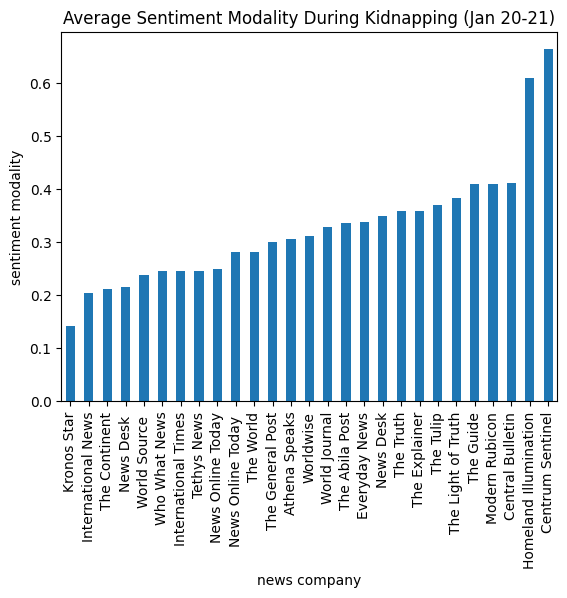

In [517]:
event_day.groupby(['news_company'])['sentiment_modality'].mean().sort_values().plot(kind='bar', xlabel='news company', ylabel='sentiment modality', title='Average Sentiment Modality During Kidnapping (Jan 20-21)');

Kronos Star has the lowest value in terms of sentient modality or the least amount of bias with respect to news reports.

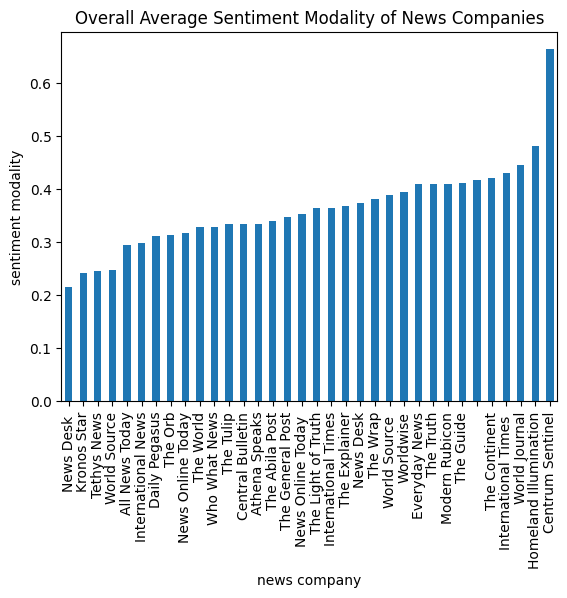

In [518]:
articles_df.groupby(['news_company'])['sentiment_modality'].mean().sort_values().plot(kind='bar', xlabel='news company', ylabel='sentiment modality', title='Overall Average Sentiment Modality of News Companies');

In [519]:
kronos_star_reports = event_day[event_day['news_company'] == 'Kronos Star']
print(kronos_star_reports.shape)
kronos_star_reports.head()

(38, 6)


,index,description,news_company,datetime,sentiment_score,sentiment_modality
680,article 710,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.0
248,article 321,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.0
235,article 31,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.0
211,article 289,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.0
203,article 281,kronos star breaking emergency gastech headqua...,Kronos Star,2014-01-20,0.0,0.0


So instead if the original 236 data points for describing the timeline of events between January 20-21st 2014 we only need 38. 


### Following the CEO's movements during the kidnapping

In [520]:
query_for_sten_movements = event_day.query("description.str.contains('sanjorge')", engine='python', inplace=False)
print(query_for_sten_movements.shape)

(53, 6)


### Average number of issued passports per year

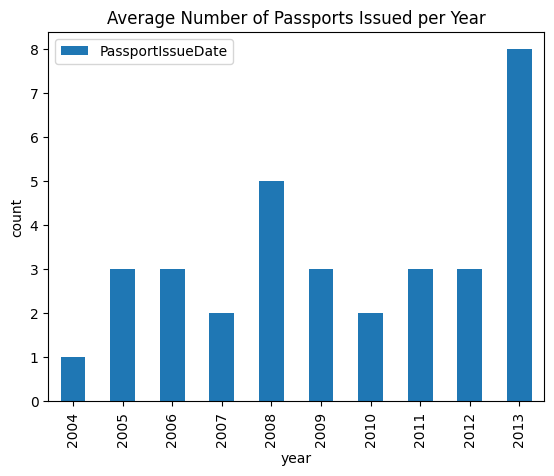

In [521]:
grouped = employee_records_df.groupby(employee_records_df['PassportIssueDate'].dt.to_period('Y')).agg({'PassportIssueDate': 'count'})
grouped.plot(kind='bar', xlabel='year', ylabel='count', title='Average Number of Passports Issued per Year');

If you are planning on fleeing the country because you did some unspoken crime, you need a passport. In the past year 2013 issued 8 passports which is more than double the previous year. 

In [522]:
passports_issued = employee_records_df[employee_records_df['PassportIssueDate'] >= '2013-01-01']
print('passports issued in the past year: {}'.format(passports_issued.shape[0]))
passports_issued

passports issued in the past year: 8


,LastName,FirstName,BirthDate,BirthCountry,Gender,CitizenshipCountry,CitizenshipBasis,CitizenshipStartDate,PassportCountry,PassportIssueDate,PassportExpirationDate,CurrentEmploymentType,CurrentEmploymentTitle,CurrentEmploymentStartDate,EmailAddress,MilitaryServiceBranch,MilitaryDischargeType,MilitaryDischargeDate,FullName
2,Pantanal,Rachel,1984-08-22,Tethys,Female,Tethys,BirthNation,1984-08-22,Tethys,2013-06-13,2023-06-12,Administration,Assistant to CIO,2013-10-01,Rachel.Pantanal@gastech.com.kronos,NaN,NaN,NaT,Rachel Pantanal
10,Orilla,Kare,1964-02-29,Tethys,Female,Tethys,BirthNation,1964-02-29,Tethys,2013-07-01,2023-06-30,Engineering,Drill Technician,2005-11-12,Kare.Orilla@gastech.com.kronos,NaN,NaN,NaT,Kare Orilla
21,Sanjorge Jr.,Sten,1948-08-29,Tethys,Male,Tethys,BirthNation,1948-08-29,Tethys,2013-04-21,2023-04-20,Executive,President/CEO,1990-11-09,Sten.Sanjorge Jr.@gastech.com.kronos,NaN,NaN,NaT,Sten Sanjorge Jr.
22,Barranco,Ingrid,1961-10-26,Tethys,Female,Tethys,BirthNation,1961-10-26,Tethys,2013-07-01,2023-06-30,Executive,SVP/CFO,2003-09-30,Ingrid.Barranco@gastech.com.kronos,NaN,NaN,NaT,Ingrid Barranco
23,Campo-Corrente,Ada,1951-11-26,Tethys,Female,Tethys,BirthNation,1951-11-26,Tethys,2013-07-14,2023-07-13,Executive,SVP/CIO,2004-10-05,Ada.Campo-Corrente@gastech.com.kronos,NaN,NaN,NaT,Ada Campo-Corrente
39,Alcazar,Lucas,1990-04-17,Tethys,Male,Tethys,BirthNation,1990-04-17,Tethys,2013-01-24,2023-01-23,Information Technology,IT Helpdesk,2010-11-30,Lucas.Alcazar@gastech.com.kronos,NaN,NaN,NaT,Lucas Alcazar
44,Lagos,Varja,1976-05-01,Tethys,Female,Tethys,BirthNation,1976-05-01,Tethys,2013-07-07,2023-07-06,Security,Badging Office,2006-10-01,Varja.Lagos@gastech.com.kronos,NaN,NaN,NaT,Varja Lagos
52,Cocinaro,Hideki,1980-12-25,Tethys,Male,Tethys,BirthNation,1980-12-25,Tethys,2013-05-25,2023-05-24,Security,Site Control,2010-01-01,Hideki.Cocinaro@gastech.com.kronos,TethanDefenseForceArmy,HonorableDischarge,2009-10-01,Hideki Cocinaro


![coin](coin.jpeg)

### Query on drugs in the city

In [523]:
drug_news = articles_df.query("description.str.contains('drug')", engine='python', inplace=False)
print(drug_news.shape)
drug_news.head()

(25, 6)


,index,description,news_company,datetime,sentiment_score,sentiment_modality
274,article 345,general post preoccupations investment busines...,The General Post,2010-12-18,0.159048,0.382857
371,article 432,light truth preoccupations productive investme...,The Light of Truth,2010-12-18,0.209524,0.443452
302,article 370,tulip care trade investments kronos davos swit...,The Tulip,2010-12-19,0.209524,0.435119
530,article 576,abila post drug related arrests rise 14 may 20...,The Abila Post,2011-05-14,-0.126373,0.413305
525,article 571,news desk drug related arrests increase abila ...,News Desk,2011-05-15,-0.099332,0.401248


In [524]:
police_news = articles_df.query("description.str.contains('police')", engine='python', inplace=False)
print(police_news.shape)
police_news.head()

(289, 6)


,index,description,news_company,datetime,sentiment_score,sentiment_modality
194,article 273,kronos star activists disrupt traffic near tis...,Kronos Star,2001-08-30,0.117857,0.427381
621,article 658,homeland illumination pok members arrested pet...,Homeland Illumination,2001-08-31,0.069444,0.404167
772,article 794,truth activists interrupt movement near areas ...,The Truth,2001-08-31,0.163636,0.389394
34,article 129,international news activists disrupt traffic n...,International News,2001-08-31,0.081818,0.363636
754,article 778,orb members pok stopped elodis kronos heavies ...,The Orb,2001-09-01,0.104945,0.318315


In [525]:
arrest_df = police_news.query("description.str.contains('blotter')", engine='python', inplace=False)
arrest_df

,index,description,news_company,datetime,sentiment_score,sentiment_modality
250,article 323,news online today kronos police arrest blotter...,News Online Today,2011-11-23,-0.097917,0.079167
301,article 37,central bulletin kronos police arrest blotter ...,Central Bulletin,2011-11-23,-0.039583,0.103125
174,article 255,athena speaks blotter arrest police force kron...,Athena Speaks,2011-11-23,-0.023438,0.055729
822,article 839,news desk arrest blotter police force kronos a...,News Desk,2011-11-24,-0.078922,0.062255


In [526]:
print(arrest_df.description.values[0])

news online today kronos police arrest blotter abila awelon cynthe dob time arrest 0003 hrs accused drug paraphernalia blumiau willem dob time arrest 2215 hrs accused possession controlled substance hashish pedestrn subject signal cusema brita dob time arrest 2205 hrs accused theft shoplifting-5th degree dunna thad dob time arrest 1500 hrs accused theft other-3rd degree gudenz kel dob time arrest 1630 hrs accused failure maintain control


# Conclusion

Ultimately, the initial peaceful environmental movement, aimed at holding officials accountable for the loss of lives caused by polluted water, gradually transformed into a realm of violence, drug-related activities, corruption, and further fatalities.

### Structure of Protectors of Kronos Network 
1. Who are the leaders? 
    * Henk Bodrogi 5 years (1997-2001)
    * Elian Karel 8 years (2001-2009)
    * Silvia Marek 5 years (2009-current)
    

2. Who is part of the extended network?
   
There are 6 POK sympathizers who are GASTech employees
* Ruscella Mies Haber
* Isia Vann 
* Loreto Bodrogi
* Inga Ferro 
* Hennie Osvalso 
* Minkie Miles

 3. How has the group structure and organization changed over time?

 Initially the POK was small and focused on holding GASTech accountable for contamination of the river causing sickeness and death of local Kronos residents. Over time the POK has evolved into a more radical and violent group, while gaining more popularity and more people joining the cause, the group's original agenda has expanded to include holding government officals accountable under corruption and bribery. The part currently consists of two factions; one being a peaceful protest backing the eniornmental movements first initiated by the founders. The second faction is lead by Mandor Vann who is a top political strategist and has ties to embassies located in Tethys and Asteria. The later faction using violence, drugs, and fear tatics to push their organized crime agenda.

4. Where are the potential connections between the POK and GASTech?

There is still speculation on who the distributor of the designer drugs is. But with Mandor Vann being a leader of the POK, he pursuaded employees of GASTech to join POK though emotional attachment with the deaths of his niece Juliana Vann and Elian Karel, and/or though money and drugs as he has ties to Asteria and more formally 
the Asterian People's Army. Which as traditionally been involved with drug trafficking throughout the region. 

5.    Describe the events of January 20-21, 2014. What is the timeline of events?


Kronos Star News Timeline
-------
article 710 - 10:00 AM a GASTech employee reports that the fire alarm was pulled in response to a bomb threat

article 692 - At approximately 10:15 AM this morning, the fire alarm went off at the GAStech headquarters building in downtown Abila.  At the time of the alarm, the media had gathered in front of the building to cover the meeting of GAStech executives, including GAStech President and CEO Sten Sanjorge Jr. and local GAStech executives and their subsequent transition to the presidentially hosted reception at the Capitol Building.

article 763 - 10:20 AM:  GAStech employees evacuate the building and a helicopter leaves from the roof of the building.

article 70 - 10:30 AM:  Abila fire department responds to the alarm.  Firemen are seen entering the building.

article 540 - 11:55 PM:  Abila Fire Captain Federigo Accardi announces that it was a false alarm and the building is safe.  In response to reporter's questions, Captain Accardi says GAStech employees made no report of a bomb threat to his agency.

article 163 - 12:20 PM:  The Abila police have been called to respond to GAStech headquarters for an unspecified emergency. (editor's note - The call was overheard on a police scanner.  The Abila police know this channel is monitored by the media and often do not give the reason for the response)

article 569 - 12:25 PM:  We have unconfirmed reports that the GAStech executives have not yet arrived at the scheduled reception at the capitol.  Kronos Star reporters covering the reception at the capitol report having seen GAStech President and CEO, Sten Sanjorge Jr., but they have not seen Ingrid Barranco, Ada Campo-Corrente, Orhan Strum, or Willem Vasco-Pais.

article 718 - 12:30 PM: According to Danisliau, the seven or eight passengers of the first plane were "business types" and appeared to be in a hurry. It was not exactly clear where they were headed. The plane took off around 12:30 local Kronos time. The second plane also carried seven or eight "business types", but seemed "much more relaxed than the first group of passengers". Danisliau said the second group of passengers "seemed to be celebrating something." The second plane departed around 14:30 around two hours after the first plane. Danisliau confirmed that the second plane's destination was Rome, Italy.

article 790 - 1:25 PM:  In attempt to find out what is going on, we have called the office of Orhan Strum, the GSAtech Chief Operating Officer.  His administrator answered the phone and informed us that Mr. Strum is unavailable. 

article 524 - 1:30 PM:  We called the office of Ada Campo-Corrente, the GSAtech Chief Information Officer.

article 462 - 1:35 PM:  We called the office of Ingrid Barranco, the GSAtech Chief Financial Officer.

article 435 - 1:40 PM:  We contacted the office of Willem Vasco-Pais, the GAStech Environmental Safety Advisor.

article 289 - 2:00 PM:  A government car was allowed through the police perimeter.  The occupant, who appears to be a security official, was let into the building.
article 518 - 4:25 PM:  GAStech employees continue to trickle out of the building.  Several have declined to talk to reporters.  However, one man told us that he was interviewed by police before being allowed to leave.  The police mentioned to him that a kidnapping had taken place.  He had not seen the people dressed in black, but speculated that perhaps they were the kidnappers.

article 539 - 5:30 PM:  We have several reports from GAStech employees that confirm a kidnapping took place, but at this time there is no information on who was involved.  Unofficial reports from the police indicate that they believe the Protectors of Kronos (POK) are behind the kidnapping and that they requested government assistance with the investigation.  We have received no information which could confirm the POK's role in this alleged kidnapping, but note that they have grown increasingly violent over the past 5 years.

article 298 - 5:50 PM:  According to a GAStech employee, the GAStech executives left the building after their meeting this morning and were headed to the reception at the capitol building.  When asked about why we were unable to reach them by phone, the employee replied that it was standard corporate security procedure for the executives to be rushed to a secure location in the event of a threat like the kidnapping.

article 441 - 6:10 PM:  The GAStech executive jet reportedly arrived in Tethys a few hours ago bearing Sten Sanjorge Jr.  The jet was quickly refueled and then departed for Abila International Airport with six GAStech officials onboard.

article 678 - 7:45 PM:  Carman said that police cannot currently account for the whereabouts of fourteen GAStech employees and have not yet been able to find the caterers.  When asked if police suspected the caterers in the kidnapping, Carman declined to comment.

article 776 - 7:35 PM:  Abila police spokesman Adrien Carman said, "Several GasTech employees appear to be missing. 

article 582 - 8:00 PM:  Government spokesman Rufus Drymiau has informed us that President Kapelou has been moved to a secure location by his security team as a precaution.

article 637 - 10:00 PM:  Tethys federal law enforcement officials and staff from the Tethyn Ministry of Foreign Affairs have arrived in Kronos to assist police in the investigation.

Other important notes: 

Jan 21st
article 481 - ABILA, Kronos - According to a press conference held at GAStech headquarters in Centrum, Tethys this morning, GAStech's President and CEO, Sten Sanjorge Jr. returned safely to Tethys after a reported kidnapping event his company's headquarters building in Abila yesterday.  Sanjorge, who had been attending a corporate meeting, was in transit from the GAStech building to the capitol when the kidnapping took place. 
Sanjorge and the four executives from the local GAStech headquarters were to attend a reception being hosted by President Kapelou at the Capitol Building.  The reception was held to celebrate the 20th year of cooperation between the corporation and our country. 

Jan 21st 
article 693 - The Abila police held a press conference at nine this morning on the kidnapping GAStech headquarters.  Police informed reporters that four of the GAStech employees whose whereabouts were unconfirmed yesterday were found overnight, leaving ten people who are presumed missing.
Police spokesman Adrien Carman said Tethyn federal law enforcement agencies are assisting in the investigation.
The POK is suspected of conducting the kidnapping, but they have yet to claim credit or release a ransom request.  The POK rhetoric has become increasingly anarchist and their actions more criminal and violent over the past several years.

article 429 - Two private jets left Abila Airport today with fourteen to sixteen passengers between the two.

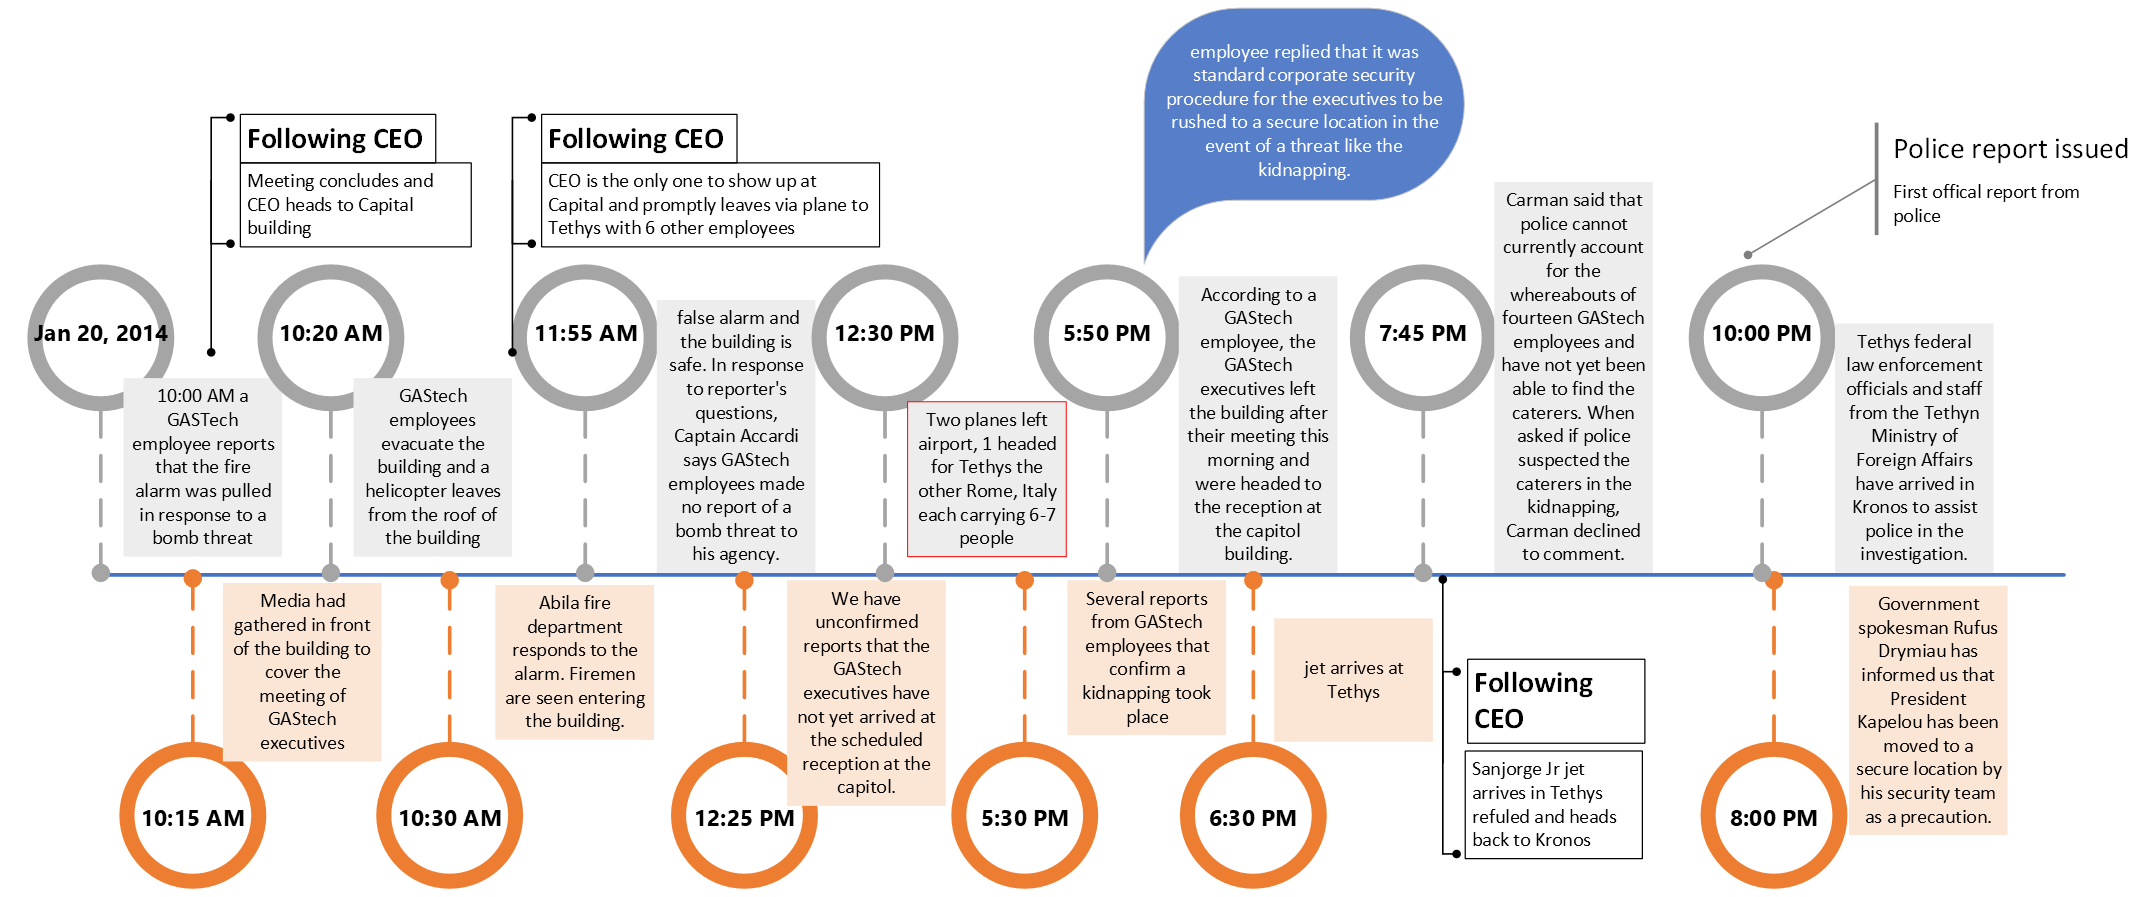

6.    Provide at least two possible explanations why the GAStech employees may be missing. What evidence do you have to support each of these explanations?

The first explanation as to why the GASTech employees went missing is that the senior executives stole the new money received from the IPO and ran away. 
There are multiple articles linking to 2 jets taking off from the airport during the time of the kidnapping, to the senior executives not showing up at the reception. The CEO was sighted at the Capitol reception, but left shortly after for Tehtys. The second jet that took off said the buisiness types were celebrating and not with the CEO Sten Sanjorge Jr. 

The second explanation as to why the GASTech employees went missing was from them being kidnapping by members of the POK who have become increasingly more violent over the past few years since Elian Karel's death. There are news articles reporting a ransom note for $20 million from the POK, but a majority of the articles say no one has ever officially claimed responsibility for the kidnapping. With the POK split into two groups, the peaceful protests and the violent activists, it's clear the more radical group would choose violence such as kidnapping to achieve their own agenda.